# Лабораторна №1
### Лінійна регресія
ФІ-21, Голуб Михайло

Завантаження бібліотек:

In [129]:
%pip install kagglehub[pandas-datasets]
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install statsmodels
%pip install scipy
%pip install scikit-learn
%pip install xgboost
%pip install PythonTaCo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Завантаження датасету Student performance data:

In [130]:

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Download latest version
path = kagglehub.dataset_download("mustafamaher2520/student-performance-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\misha\.cache\kagglehub\datasets\mustafamaher2520\student-performance-data\versions\1


In [131]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.api as sm

from sklearn.model_selection import train_test_split


matplotlib.rcParams['figure.figsize'] = (16, 10)

df = pd.read_csv(path+"\SrudentPerformanceScore.csv")
df.head(5)

<>:15: SyntaxWarning: invalid escape sequence '\S'
<>:15: SyntaxWarning: invalid escape sequence '\S'
C:\Users\misha\AppData\Local\Temp\ipykernel_29936\2421265708.py:15: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv(path+"\SrudentPerformanceScore.csv")


,Student_ID,Performance_Score,Sleep_Hours,Stress_Level,Previous_Exam_Scores,Study_Hours
0,110,28.7,4.4,6.4,87.2,4.3
1,111,33.5,7.5,5.8,72.1,3.9
2,112,40.5,8.7,4.0,62.2,3.8
3,113,44.8,6.6,1.0,80.8,4.7
4,114,36.8,8.5,4.6,53.2,7.2


# Підготовчий етап

### Опис датасету:

This dataset contains detailed records of students with their academic performance rated out of 100. It includes various factors that can influence student outcomes such as average sleep hours per night, self-reported stress levels on a scale from 1 to 10, previous exam scores, and daily study hours. Each student is uniquely identified by a Student ID.

The dataset is designed to facilitate exploratory data analysis, predictive modeling, and multiple regression analysis to understand how sleep patterns, stress, study habits, and past academic performance collectively affect current performance. It also supports thorough assumption testing including linearity, homoscedasticity, normality, independence, and multicollinearity checks.

This data is generated with realistic ranges and distributions to simulate real student behaviors and academic results, making it ideal for educational research and machine learning projects focusing on student success factors.

Columns Description:
Student_ID: Unique identifier for each student
Performance_Score: Academic performance score (0–100)
Sleep_Hours: Average hours slept per night
Stress_Level: Self-reported stress level (1 very low to 10 very high)
Previous_Exam_Scores: Past exam scores (0–100)
Study_Hours: Average daily study time in hours

### Аналіз датасету

In [132]:
print("rows:",len(df))
print("columns:",len(df.columns))
for column in df.columns:
    print(column, type(df[column][0]))
df.count()

rows: 322
columns: 6
Student_ID <class 'numpy.int64'>
Performance_Score <class 'numpy.float64'>
Sleep_Hours <class 'numpy.float64'>
Stress_Level <class 'numpy.float64'>
Previous_Exam_Scores <class 'numpy.float64'>
Study_Hours <class 'numpy.float64'>


Student_ID              322
Performance_Score       322
Sleep_Hours             322
Stress_Level            322
Previous_Exam_Scores    322
Study_Hours             322
dtype: int64

### Визначення вхідних та вихідних параметрів

Student_ID не є параметром

Performance_Score є вихідним параметром

Усі інші параметри -- вхідні

In [133]:
df = df.drop(["Student_ID"], axis = 1)

### Візуалізація кореляцій параметрів

C:\Users\misha\AppData\Local\Temp\ipykernel_29936\2211978679.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = ax.text(j, i, str(round(100*corr[corr.columns[j]][i]))+"%",


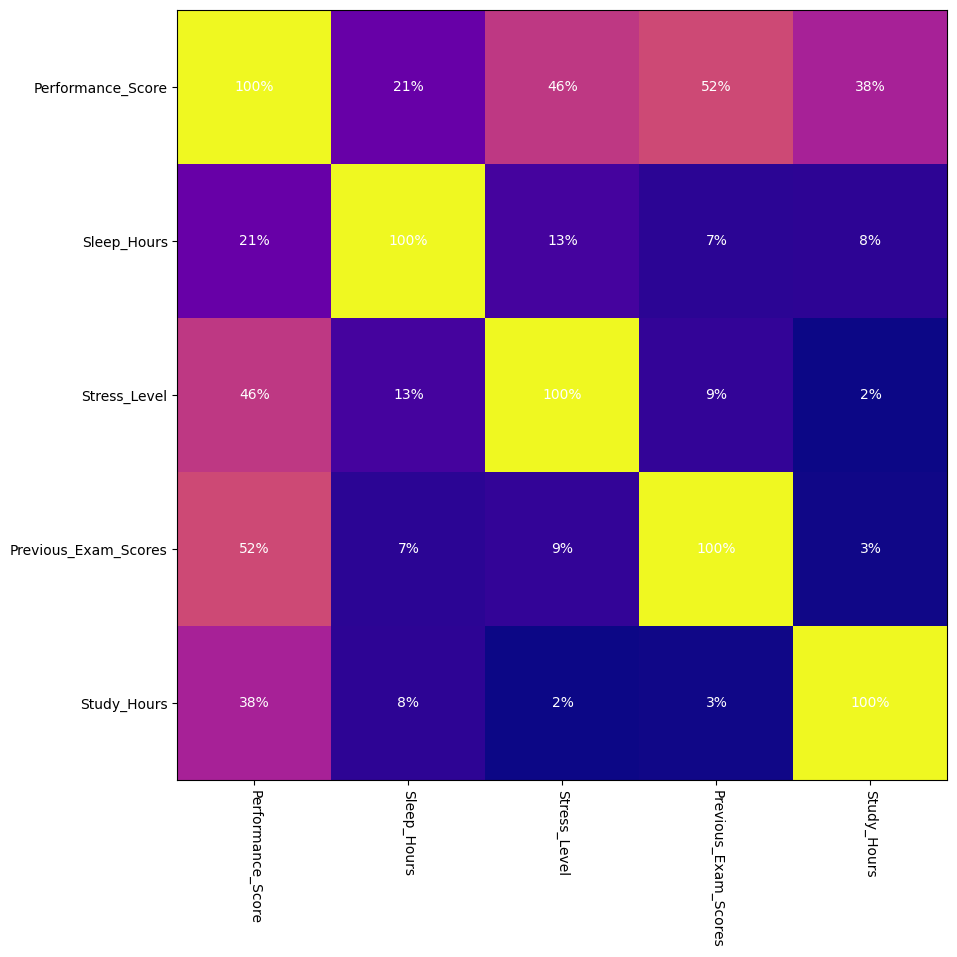

In [134]:


inputs = ["Performance_Score",
        "Sleep_Hours", 
        "Stress_Level", 
        "Previous_Exam_Scores",
        "Study_Hours"]
outputs = ["Performance_Score",
        "Sleep_Hours", 
        "Stress_Level", 
        "Previous_Exam_Scores",
        "Study_Hours"]

fig, ax = plt.subplots()

corr = pd.DataFrame()
for a in inputs:
    for b in outputs:
        corr.loc[a, b] = abs(df.corr().loc[a, b])

ax.imshow(corr, cmap='plasma', interpolation='nearest')
plt.yticks(ticks = range(len(inputs)),labels = inputs)
plt.xticks(ticks = range(len(outputs)),labels = outputs, rotation=-90)

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        text = ax.text(j, i, str(round(100*corr[corr.columns[j]][i]))+"%",
                       ha="center", va="center", color="w")

Вхідні параметри між собою мало корельовані, а вихідний параметр слабо корельований з часом сну та не сильно корельований з іншими параметрами

C:\Users\misha\AppData\Local\Temp\ipykernel_29936\803226120.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = ax.text(j, i, str(round(100*corr[corr.columns[j]][i]))+"%",


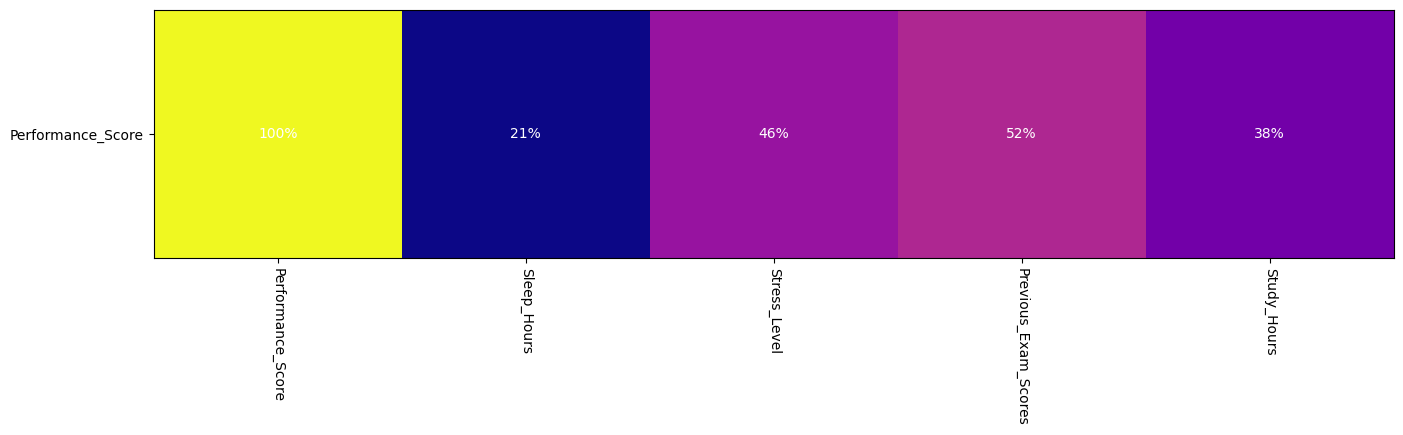

In [135]:
inputs = ["Performance_Score"]
outputs = ["Performance_Score",
        "Sleep_Hours", 
        "Stress_Level", 
        "Previous_Exam_Scores",
        "Study_Hours"]
fig, ax = plt.subplots()
corr = pd.DataFrame()
for a in inputs:
    for b in outputs:
        corr.loc[a, b] = abs(df.corr().loc[a, b])



ax.imshow(corr, cmap='plasma', interpolation='nearest')
plt.yticks(ticks = range(len(inputs)),labels = inputs)
plt.xticks(ticks = range(len(outputs)),labels = outputs, rotation=-90)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        text = ax.text(j, i, str(round(100*corr[corr.columns[j]][i]))+"%",
                       ha="center", va="center", color="w")

Text(0.5, 0, 'Study_Hours')

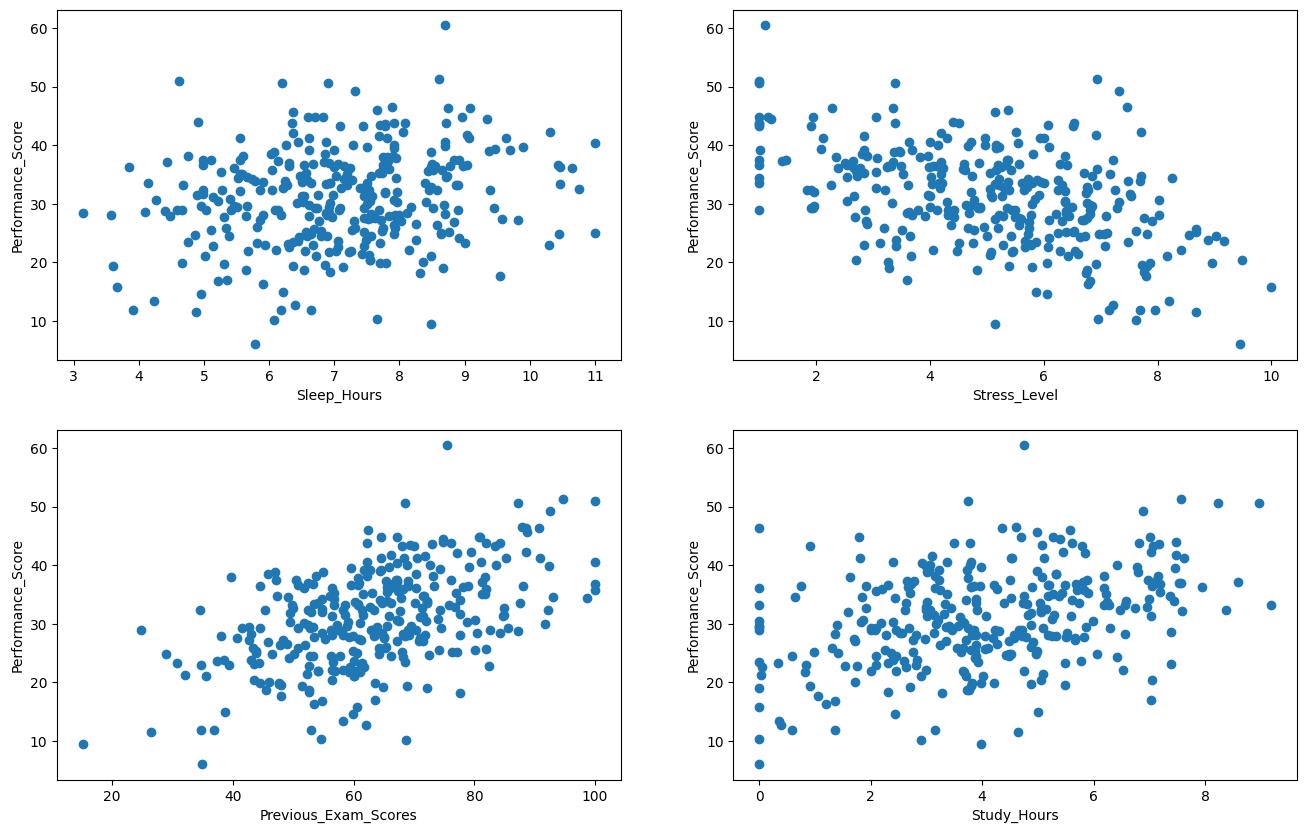

In [136]:
plt.subplot(221)
plt.scatter(df["Sleep_Hours"], df["Performance_Score"])
plt.ylabel("Performance_Score")
plt.xlabel("Sleep_Hours")

plt.subplot(222)
plt.scatter(df["Stress_Level"], df["Performance_Score"])
plt.ylabel("Performance_Score")
plt.xlabel("Stress_Level")

plt.subplot(223)
plt.scatter(df["Previous_Exam_Scores"], df["Performance_Score"])
plt.ylabel("Performance_Score")
plt.xlabel("Previous_Exam_Scores")

plt.subplot(224)
plt.scatter(df["Study_Hours"], df["Performance_Score"])
plt.ylabel("Performance_Score")
plt.xlabel("Study_Hours")

Розбиття на навчальний та тестовий датасети:

In [137]:
X = df.drop('Performance_Score', axis=1)  # Features
Y = df['Performance_Score']  # Target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1023)

# Лінійна регресія на Vanilla Python

Побудова простих лінійних регресій з одним параметром: 

Sleep_Hours: slope=1.177, intercept=22.633
Stress_Level: slope=-1.986, intercept=41.049
Previous_Exam_Scores: slope=0.297, intercept=12.130
Study_Hours: slope=1.602, intercept=24.498


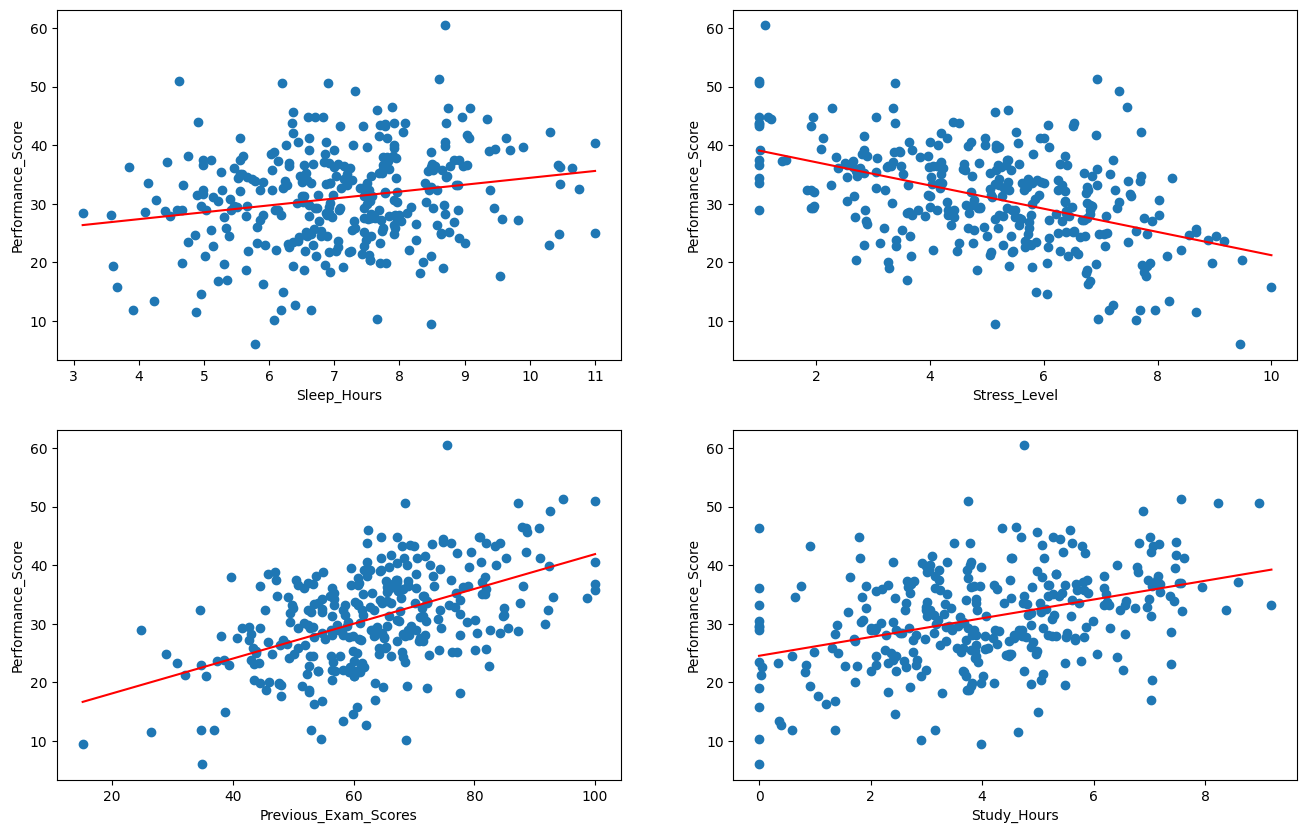

In [ ]:
names = ["Sleep_Hours", 
        "Stress_Level", 
        "Previous_Exam_Scores",
        "Study_Hours"]
for name in names:
    x_name = X[name].to_numpy()

    # compute slope & intercept directly
    b1 = np.cov(x_name, Y, bias=True)[0,1] / np.var(x_name)
    b0 = np.mean(Y) - b1 * np.mean(x_name)

    print(f"{name}: slope={b1:.3f}, intercept={b0:.3f}")

    # regression line
    regdots_x = [np.min(x_name), np.max(x_name)]
    regdots_y = [b0 + b1 * np.min(x_name), b0 + b1 * np.max(x_name)]

    plt.subplot(221 + names.index(name))
    plt.scatter(x_name, Y)
    plt.plot(regdots_x, regdots_y, c="r")
    plt.ylabel("Performance_Score")
    plt.xlabel(name)

### Створення моделі, яка враховує всі входи:

In [139]:
X_matrix = X_train.to_numpy()
Y_matrix = Y_train.to_numpy()
X_t = np.transpose(X_matrix)
B_matrix = np.linalg.matrix_power(X_t @ X_matrix, -1) @ X_t @ Y_matrix

y_pred = np.sum(B_matrix*X_matrix, axis = 1)
residuals = y_pred - Y_matrix[0]

MSE = np.mean(np.power(residuals, 2))
print("MSE:", MSE)
sigma_hat = np.sqrt(MSE)

MSE: 143.48823252705026


### Перевірка моделі на навчальному наборі даних


DIAGNOSTIC STATISTICS
Shapiro-Wilk test: W = 0.9874, p-value = 0.0447
Jarque-Bera test: JB = 8.4696, p-value = 0.0145
Condition number: 36.64
VIF values: ['12.53', '5.92', '11.95', '4.54']
Mean VIF: 8.74
MSE: 143.48823252705026


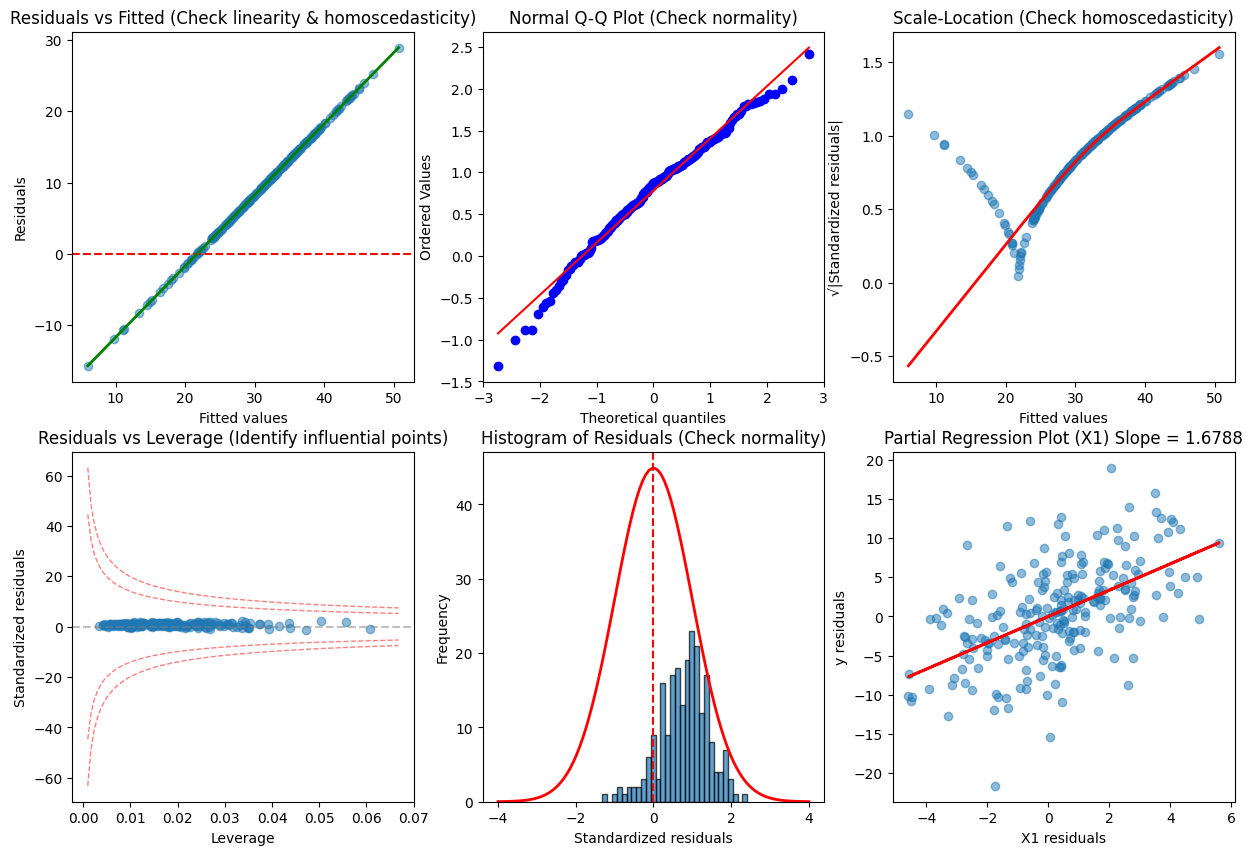

In [140]:
# Create comprehensive diagnostic plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Residuals vs Fitted
axes[0, 0].scatter(y_pred, residuals, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted (Check linearity & homoscedasticity)')

# Add lowess smoothing line

lowess_result = lowess(residuals, y_pred, frac=0.6)
axes[0, 0].plot(lowess_result[:, 0], lowess_result[:, 1], 'g-', linewidth=2)

# 2. Q-Q plot
standardized_residuals = residuals / sigma_hat
stats.probplot(standardized_residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q Plot (Check normality)')

# 3. Scale-Location (Spread-Location)
sqrt_abs_std_resid = np.sqrt(np.abs(standardized_residuals))
axes[0, 2].scatter(y_pred, sqrt_abs_std_resid, alpha=0.5)
lowess_sl = lowess(sqrt_abs_std_resid, y_pred, frac=0.6)
axes[0, 2].plot(lowess_sl[:, 0], lowess_sl[:, 1], 'r-', linewidth=2)
axes[0, 2].set_xlabel('Fitted values')
axes[0, 2].set_ylabel('√|Standardized residuals|')
axes[0, 2].set_title('Scale-Location (Check homoscedasticity)')

# 4. Residuals vs Leverage
# Calculate leverage (hat values)
H = np.matmul(np.matmul(X_matrix, np.linalg.matrix_power(np.matmul(X_t ,X_matrix), -1)), X_t)
leverage = np.diag(H)
axes[1, 0].scatter(leverage, standardized_residuals, alpha=0.5)
axes[1, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1, 0].set_xlabel('Leverage')
axes[1, 0].set_ylabel('Standardized residuals')
axes[1, 0].set_title('Residuals vs Leverage (Identify influential points)')

# Add Cook's distance contours
k = X_matrix.shape[1]

x_lev = np.linspace(0.001, max(leverage)*1.1, 100)
for cook_level in [0.5, 1.0]:
    y_cook_upper = np.sqrt(cook_level * k * (1 - x_lev) / x_lev)
    y_cook_lower = -y_cook_upper
    axes[1, 0].plot(x_lev, y_cook_upper, 'r--', alpha=0.5, linewidth=1)
    axes[1, 0].plot(x_lev, y_cook_lower, 'r--', alpha=0.5, linewidth=1)

# 5. Histogram of residuals
axes[1, 1].hist(standardized_residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--')
x_norm = np.linspace(-4, 4, 100)
axes[1, 1].plot(x_norm, stats.norm.pdf(x_norm) * len(residuals) * 0.5, 'r-', linewidth=2)
axes[1, 1].set_xlabel('Standardized residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Residuals (Check normality)')

# 6. Partial regression plots (for first predictor X1)
# Residuals of Y ~ X0(intercept) + X2 + X3
X_others = X_matrix[:, [1, 2, 3]]  # Exclude X1 (column 1)
model_y_others = sm.OLS(Y_matrix, X_others).fit()
resid_y = model_y_others.resid

# Residuals of X1 ~ X0(intercept) + X2 + X3
model_x1_others = sm.OLS(X_matrix[:, 0], X_others).fit()
resid_x1 = model_x1_others.resid

axes[1, 2].scatter(resid_x1, resid_y, alpha=0.5)
partial_slope = np.cov(resid_x1, resid_y)[0, 1] / np.var(resid_x1)
axes[1, 2].plot(resid_x1, partial_slope * resid_x1, 'r-', linewidth=2)
axes[1, 2].set_xlabel('X1 residuals')
axes[1, 2].set_ylabel('y residuals')
axes[1, 2].set_title(f'Partial Regression Plot (X1) Slope = {partial_slope:.4f}')

# Additional diagnostic statistics
print("\n" + "="*60)
print("DIAGNOSTIC STATISTICS")
print("="*60)

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_pvalue = stats.shapiro(residuals[:5000] if len(residuals) > 5000 else residuals)
print(f"Shapiro-Wilk test: W = {shapiro_stat:.4f}, p-value = {shapiro_pvalue:.4f}")

# Jarque-Bera test for normality
jb_stat, jb_pvalue = stats.jarque_bera(residuals)
print(f"Jarque-Bera test: JB = {jb_stat:.4f}, p-value = {jb_pvalue:.4f}")

# Condition number (multicollinearity indicator)
XtX = np.matmul(X_t, X_matrix)
eigenvalues = np.linalg.eigvals(XtX)
condition_number = np.sqrt(max(eigenvalues) / min(eigenvalues))
print(f"Condition number: {condition_number:.2f}")

# Mean VIF (only for predictors, not intercept)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_matrix, i) for i in range(0, k)] 
print(f"VIF values: {[f'{v:.2f}' for v in vif]}")
print(f"Mean VIF: {np.mean(vif):.2f}")

print("MSE:", MSE)

pass

Числові показники:
* За тестами Шапіро-Вілка та Жарка-Бера P < 0.05, отже залишки (residuals) не є нормально розподіленими. Але W майже 1, отже нормальність порушена не сильно.
* За показником мультиколінеарності > 30 присутня значна мультиколінеарність
* За VIF > 10 перша та третя колонки мають серйозну мультиколінеарність. За середнім VIF -- присутня значна мультиколінеарність.

Графічні показники:
* Residuals vs fitted видно overfit, що очікувано в тесті на навчальних даних
* В Q-Q більшість точок лежить на лінії, але хвости відхиляються. Це підтверджує результати Shapiro–Wilk та Jarque–Bera.
* Scale–Location має U-подібну форму, присутня гетероскедастичність.
* Residuals vs Leverage не містить явних точок із дуже великим leverage або Cook’s distance, отже впливових точок немає.
* Histogram of residuals розподіл близький до нормального, але скошений. Це співпадає з іншими тестами на нормальність.
* Partial Regression Plot (X1) показує чітку позитивну залежність між залишками y та залишками X1, отже X1 має значущий ефект.

Тест на автокореляцію не потрібен, оскільки дані не мають прив'язки до часу.



Отже, необхідно зменшити мультиколінеарність і гетероскедастичність. 

### Виправлання мультиколінеарності:
Необхідно прибрати один з входів, нехай це буде третій вхід -- Previous_Exam_Scores

In [141]:
X = df.drop(['Performance_Score', "Previous_Exam_Scores"], axis=1)  # Features
Y = df['Performance_Score']  # Target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1023)


DIAGNOSTIC STATISTICS
Shapiro-Wilk test: W = 0.9952, p-value = 0.7072
Jarque-Bera test: JB = 1.3233, p-value = 0.5160
Condition number: 5.29
VIF values: ['7.44', '5.56', '4.23']
Mean VIF: 5.74
MSE: 62.146663017590264


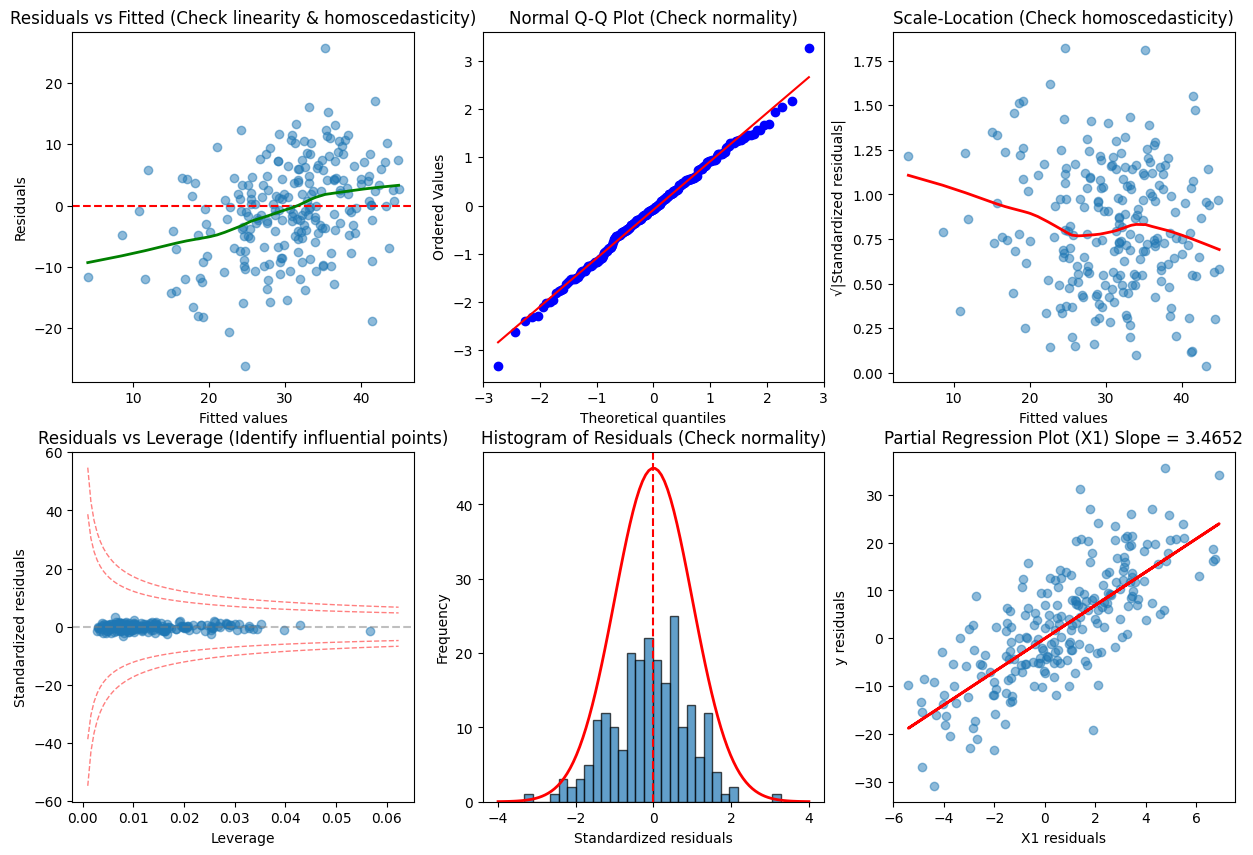

In [142]:
X_matrix = X_train.to_numpy()
Y_matrix = Y_train.to_numpy()

X_t = np.transpose(X_matrix)
B_matrix = np.linalg.matrix_power(X_t @ X_matrix, -1) @ X_t @ Y_matrix

y_pred = np.sum(B_matrix*X_matrix, axis = 1)
residuals = y_pred - Y_matrix

MSE = np.mean(np.power(residuals, 2))
sigma_hat = np.sqrt(MSE)

# Create comprehensive diagnostic plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Residuals vs Fitted
axes[0, 0].scatter(y_pred, residuals, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted (Check linearity & homoscedasticity)')

# Add lowess smoothing line

lowess_result = lowess(residuals, y_pred, frac=0.6)
axes[0, 0].plot(lowess_result[:, 0], lowess_result[:, 1], 'g-', linewidth=2)

# 2. Q-Q plot
standardized_residuals = residuals / sigma_hat
stats.probplot(standardized_residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q Plot (Check normality)')

# 3. Scale-Location (Spread-Location)
sqrt_abs_std_resid = np.sqrt(np.abs(standardized_residuals))
axes[0, 2].scatter(y_pred, sqrt_abs_std_resid, alpha=0.5)
lowess_sl = lowess(sqrt_abs_std_resid, y_pred, frac=0.6)
axes[0, 2].plot(lowess_sl[:, 0], lowess_sl[:, 1], 'r-', linewidth=2)
axes[0, 2].set_xlabel('Fitted values')
axes[0, 2].set_ylabel('√|Standardized residuals|')
axes[0, 2].set_title('Scale-Location (Check homoscedasticity)')

# 4. Residuals vs Leverage
# Calculate leverage (hat values)
H = np.matmul(np.matmul(X_matrix, np.linalg.matrix_power(np.matmul(X_t ,X_matrix), -1)), X_t)
leverage = np.diag(H)
axes[1, 0].scatter(leverage, standardized_residuals, alpha=0.5)
axes[1, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1, 0].set_xlabel('Leverage')
axes[1, 0].set_ylabel('Standardized residuals')
axes[1, 0].set_title('Residuals vs Leverage (Identify influential points)')

# Add Cook's distance contours
k = X_matrix.shape[1]

x_lev = np.linspace(0.001, max(leverage)*1.1, 100)
for cook_level in [0.5, 1.0]:
    y_cook_upper = np.sqrt(cook_level * k * (1 - x_lev) / x_lev)
    y_cook_lower = -y_cook_upper
    axes[1, 0].plot(x_lev, y_cook_upper, 'r--', alpha=0.5, linewidth=1)
    axes[1, 0].plot(x_lev, y_cook_lower, 'r--', alpha=0.5, linewidth=1)

# 5. Histogram of residuals
axes[1, 1].hist(standardized_residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--')
x_norm = np.linspace(-4, 4, 100)
axes[1, 1].plot(x_norm, stats.norm.pdf(x_norm) * len(residuals) * 0.5, 'r-', linewidth=2)
axes[1, 1].set_xlabel('Standardized residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Residuals (Check normality)')

# 6. Partial regression plots (for first predictor X1)
# Residuals of Y ~ X0(intercept) + X2 + X3
X_others = X_matrix[:, [1, 2]]  # Exclude X1 (column 1)
model_y_others = sm.OLS(Y_matrix, X_others).fit()
resid_y = model_y_others.resid

# Residuals of X1 ~ X0(intercept) + X2 + X3
model_x1_others = sm.OLS(X_matrix[:, 0], X_others).fit()
resid_x1 = model_x1_others.resid

axes[1, 2].scatter(resid_x1, resid_y, alpha=0.5)
partial_slope = np.cov(resid_x1, resid_y)[0, 1] / np.var(resid_x1)
axes[1, 2].plot(resid_x1, partial_slope * resid_x1, 'r-', linewidth=2)
axes[1, 2].set_xlabel('X1 residuals')
axes[1, 2].set_ylabel('y residuals')
axes[1, 2].set_title(f'Partial Regression Plot (X1) Slope = {partial_slope:.4f}')

# Additional diagnostic statistics
print("\n" + "="*60)
print("DIAGNOSTIC STATISTICS")
print("="*60)

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_pvalue = stats.shapiro(residuals[:5000] if len(residuals) > 5000 else residuals)
print(f"Shapiro-Wilk test: W = {shapiro_stat:.4f}, p-value = {shapiro_pvalue:.4f}")

# Jarque-Bera test for normality
jb_stat, jb_pvalue = stats.jarque_bera(residuals)
print(f"Jarque-Bera test: JB = {jb_stat:.4f}, p-value = {jb_pvalue:.4f}")

# Condition number (multicollinearity indicator)
XtX = np.matmul(X_t, X_matrix)
eigenvalues = np.linalg.eigvals(XtX)
condition_number = np.sqrt(max(eigenvalues) / min(eigenvalues))
print(f"Condition number: {condition_number:.2f}")

# Mean VIF (only for predictors, not intercept)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_matrix, i) for i in range(0, k)] 
print(f"VIF values: {[f'{v:.2f}' for v in vif]}")
print(f"Mean VIF: {np.mean(vif):.2f}")

print("MSE:", MSE)
pass

Вилучення Previous_Exam_Scores призвело до покращення значень VIF до прийнятих (VIF < 8).

Числові показники:
* За тестами Шапіро-Вілка та Жарка-Бера P > 0.05, отже залишки (residuals) є нормально розподіленими.
* За показником мультиколінеарності < 5 мультиколінеарність виправлено.
* За VIF < 10 мультиколінеарність виправлено.

Графічні показники:
* Residuals vs fitted розкидані довкола нуля, лінійність дотримано.
* В Q-Q майже усі точки лежать на діагоналі. Це підтверджує результати Shapiro–Wilk та Jarque–Bera.
* Scale–Location має майже пряму форму і значно менший вертикальний діапазон, розкид точок стабільний по всій шкалі fitted values. Гомоскедастичність майже дотримано.
* Residuals vs Leverage не містить явних точок із дуже великим leverage або Cook’s distance, отже впливових точок немає.
* Histogram of residuals розподіл схожий на симетричний, схожий на дзвін.
* Partial Regression Plot (X1) показує чітку позитивну залежність між залишками y та залишками X1, отже X1 має значущий ефект.


Отже, успішно зменшено мультиколінеарність та гетероскедастичність.

Таким чином, отримано модель з непоганими показниками на навчальному наборі даних. Нижче виведено отримані коефіцієнти лінійної регресії

In [143]:
print(B_matrix)

[ 3.51633589 -0.88719549  2.49649406]


### Застосування моделі до тестового набору даних


DIAGNOSTIC STATISTICS
Shapiro-Wilk test: W = 0.9860, p-value = 0.3946
Jarque-Bera test: JB = 1.3766, p-value = 0.5024
Condition number: 5.37
VIF values: ['7.06', '6.52', '4.75']
Mean VIF: 6.11
MSE: 52.59699472671863


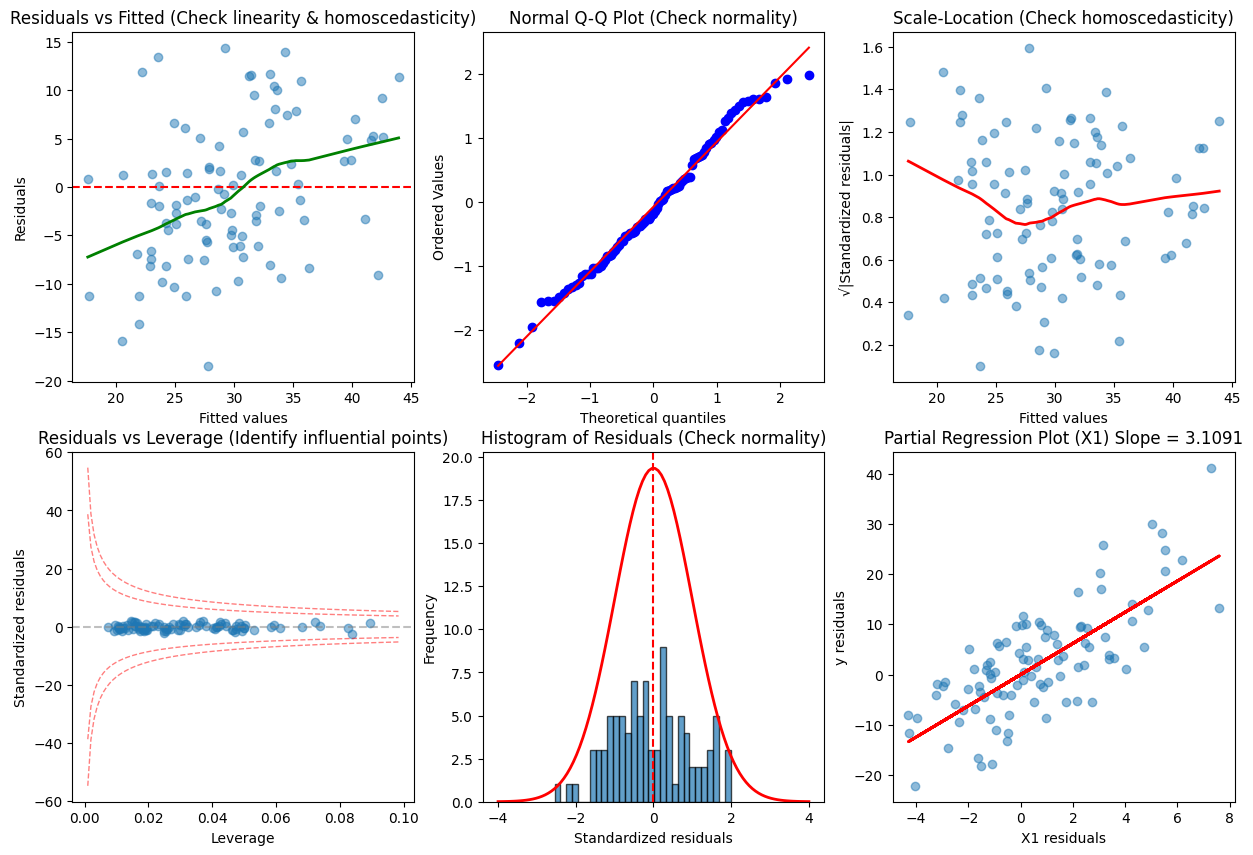

In [144]:
X_matrix = X_test.to_numpy()
Y_matrix = Y_test.to_numpy()

X_t = np.transpose(X_matrix)
B_matrix = np.linalg.matrix_power(X_t @ X_matrix, -1) @ X_t @ Y_matrix

y_pred = np.sum(B_matrix*X_matrix, axis = 1)
residuals = y_pred - Y_matrix

MSE = np.mean(np.power(residuals, 2))
raw_mse = MSE
sigma_hat = np.sqrt(MSE)

# Create comprehensive diagnostic plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Residuals vs Fitted
axes[0, 0].scatter(y_pred, residuals, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted (Check linearity & homoscedasticity)')

# Add lowess smoothing line

lowess_result = lowess(residuals, y_pred, frac=0.6)
axes[0, 0].plot(lowess_result[:, 0], lowess_result[:, 1], 'g-', linewidth=2)

# 2. Q-Q plot
standardized_residuals = residuals / sigma_hat
stats.probplot(standardized_residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q Plot (Check normality)')

# 3. Scale-Location (Spread-Location)
sqrt_abs_std_resid = np.sqrt(np.abs(standardized_residuals))
axes[0, 2].scatter(y_pred, sqrt_abs_std_resid, alpha=0.5)
lowess_sl = lowess(sqrt_abs_std_resid, y_pred, frac=0.6)
axes[0, 2].plot(lowess_sl[:, 0], lowess_sl[:, 1], 'r-', linewidth=2)
axes[0, 2].set_xlabel('Fitted values')
axes[0, 2].set_ylabel('√|Standardized residuals|')
axes[0, 2].set_title('Scale-Location (Check homoscedasticity)')

# 4. Residuals vs Leverage
# Calculate leverage (hat values)
H = np.matmul(np.matmul(X_matrix, np.linalg.matrix_power(np.matmul(X_t ,X_matrix), -1)), X_t)
leverage = np.diag(H)
axes[1, 0].scatter(leverage, standardized_residuals, alpha=0.5)
axes[1, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1, 0].set_xlabel('Leverage')
axes[1, 0].set_ylabel('Standardized residuals')
axes[1, 0].set_title('Residuals vs Leverage (Identify influential points)')

# Add Cook's distance contours
k = X_matrix.shape[1]

x_lev = np.linspace(0.001, max(leverage)*1.1, 100)
for cook_level in [0.5, 1.0]:
    y_cook_upper = np.sqrt(cook_level * k * (1 - x_lev) / x_lev)
    y_cook_lower = -y_cook_upper
    axes[1, 0].plot(x_lev, y_cook_upper, 'r--', alpha=0.5, linewidth=1)
    axes[1, 0].plot(x_lev, y_cook_lower, 'r--', alpha=0.5, linewidth=1)

# 5. Histogram of residuals
axes[1, 1].hist(standardized_residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--')
x_norm = np.linspace(-4, 4, 100)
axes[1, 1].plot(x_norm, stats.norm.pdf(x_norm) * len(residuals) * 0.5, 'r-', linewidth=2)
axes[1, 1].set_xlabel('Standardized residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Residuals (Check normality)')

# 6. Partial regression plots (for first predictor X1)
# Residuals of Y ~ X0(intercept) + X2 + X3
X_others = X_matrix[:, [1, 2]]  # Exclude X1 (column 1)
model_y_others = sm.OLS(Y_matrix, X_others).fit()
resid_y = model_y_others.resid

# Residuals of X1 ~ X0(intercept) + X2 + X3
model_x1_others = sm.OLS(X_matrix[:, 0], X_others).fit()
resid_x1 = model_x1_others.resid

axes[1, 2].scatter(resid_x1, resid_y, alpha=0.5)
partial_slope = np.cov(resid_x1, resid_y)[0, 1] / np.var(resid_x1)
axes[1, 2].plot(resid_x1, partial_slope * resid_x1, 'r-', linewidth=2)
axes[1, 2].set_xlabel('X1 residuals')
axes[1, 2].set_ylabel('y residuals')
axes[1, 2].set_title(f'Partial Regression Plot (X1) Slope = {partial_slope:.4f}')

# Additional diagnostic statistics
print("\n" + "="*60)
print("DIAGNOSTIC STATISTICS")
print("="*60)

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_pvalue = stats.shapiro(residuals[:5000] if len(residuals) > 5000 else residuals)
print(f"Shapiro-Wilk test: W = {shapiro_stat:.4f}, p-value = {shapiro_pvalue:.4f}")

# Jarque-Bera test for normality
jb_stat, jb_pvalue = stats.jarque_bera(residuals)
print(f"Jarque-Bera test: JB = {jb_stat:.4f}, p-value = {jb_pvalue:.4f}")

# Condition number (multicollinearity indicator)
XtX = np.matmul(X_t, X_matrix)
eigenvalues = np.linalg.eigvals(XtX)
condition_number = np.sqrt(max(eigenvalues) / min(eigenvalues))
print(f"Condition number: {condition_number:.2f}")

# Mean VIF (only for predictors, not intercept)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_matrix, i) for i in range(0, k)] 
print(f"VIF values: {[f'{v:.2f}' for v in vif]}")
print(f"Mean VIF: {np.mean(vif):.2f}")

print("MSE:", MSE)
pass

На тестових даних модель показує схожі, хоч і дещо гірші, числові та графічні показники. Можна вважати модель такою, що працює коректно.

# Регресія на SciKit learn

In [145]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, Y_train)
print(reg.score(X_train, Y_train))
print(reg.score(X_test,Y_test))

0.41777042124405683
0.27495031522074276


### Перевірка моделі на навчальному наборі даних


DIAGNOSTIC STATISTICS
Shapiro-Wilk test: W = 0.9899, p-value = 0.1160
Jarque-Bera test: JB = 4.2065, p-value = 0.1221
Condition number: 5.29
VIF values: ['7.44', '5.56', '4.23']
Mean VIF: 5.74
MSE: 43.98414433899041


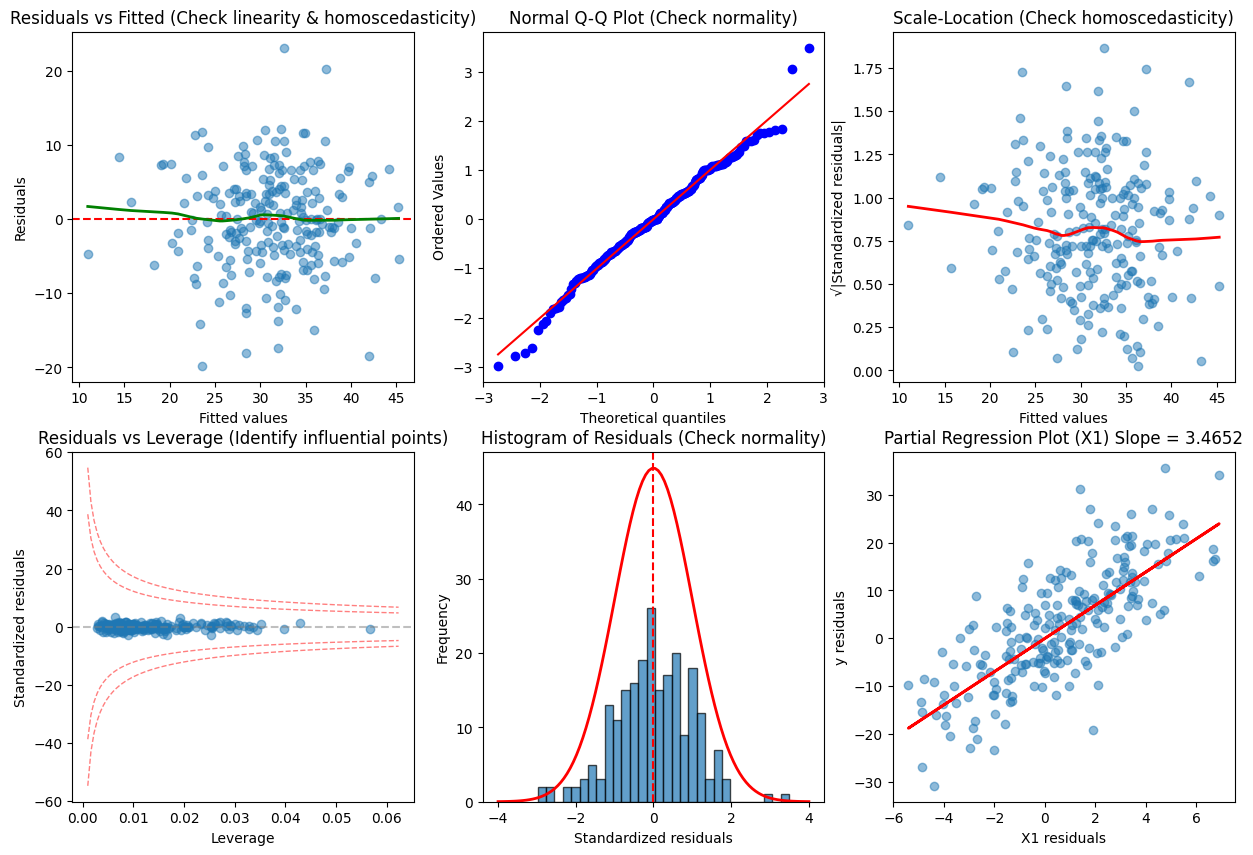

In [146]:
X_matrix = X_train.to_numpy()
Y_matrix = Y_train.to_numpy()

X_t = np.transpose(X_matrix)

y_pred = reg.predict(X_train)
residuals = y_pred - Y_matrix

MSE = np.mean(np.power(residuals, 2))
sigma_hat = np.sqrt(MSE)

# Create comprehensive diagnostic plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Residuals vs Fitted
axes[0, 0].scatter(y_pred, residuals, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted (Check linearity & homoscedasticity)')

# Add lowess smoothing line

lowess_result = lowess(residuals, y_pred, frac=0.6)
axes[0, 0].plot(lowess_result[:, 0], lowess_result[:, 1], 'g-', linewidth=2)

# 2. Q-Q plot
standardized_residuals = residuals / sigma_hat
stats.probplot(standardized_residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q Plot (Check normality)')

# 3. Scale-Location (Spread-Location)
sqrt_abs_std_resid = np.sqrt(np.abs(standardized_residuals))
axes[0, 2].scatter(y_pred, sqrt_abs_std_resid, alpha=0.5)
lowess_sl = lowess(sqrt_abs_std_resid, y_pred, frac=0.6)
axes[0, 2].plot(lowess_sl[:, 0], lowess_sl[:, 1], 'r-', linewidth=2)
axes[0, 2].set_xlabel('Fitted values')
axes[0, 2].set_ylabel('√|Standardized residuals|')
axes[0, 2].set_title('Scale-Location (Check homoscedasticity)')

# 4. Residuals vs Leverage
# Calculate leverage (hat values)
H = np.matmul(np.matmul(X_matrix, np.linalg.matrix_power(np.matmul(X_t ,X_matrix), -1)), X_t)
leverage = np.diag(H)
axes[1, 0].scatter(leverage, standardized_residuals, alpha=0.5)
axes[1, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1, 0].set_xlabel('Leverage')
axes[1, 0].set_ylabel('Standardized residuals')
axes[1, 0].set_title('Residuals vs Leverage (Identify influential points)')

# Add Cook's distance contours
k = X_matrix.shape[1]

x_lev = np.linspace(0.001, max(leverage)*1.1, 100)
for cook_level in [0.5, 1.0]:
    y_cook_upper = np.sqrt(cook_level * k * (1 - x_lev) / x_lev)
    y_cook_lower = -y_cook_upper
    axes[1, 0].plot(x_lev, y_cook_upper, 'r--', alpha=0.5, linewidth=1)
    axes[1, 0].plot(x_lev, y_cook_lower, 'r--', alpha=0.5, linewidth=1)

# 5. Histogram of residuals
axes[1, 1].hist(standardized_residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--')
x_norm = np.linspace(-4, 4, 100)
axes[1, 1].plot(x_norm, stats.norm.pdf(x_norm) * len(residuals) * 0.5, 'r-', linewidth=2)
axes[1, 1].set_xlabel('Standardized residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Residuals (Check normality)')

# 6. Partial regression plots (for first predictor X1)
# Residuals of Y ~ X0(intercept) + X2 + X3
X_others = X_matrix[:, [1, 2]]  # Exclude X1 (column 1)
model_y_others = sm.OLS(Y_matrix, X_others).fit()
resid_y = model_y_others.resid

# Residuals of X1 ~ X0(intercept) + X2 + X3
model_x1_others = sm.OLS(X_matrix[:, 0], X_others).fit()
resid_x1 = model_x1_others.resid

axes[1, 2].scatter(resid_x1, resid_y, alpha=0.5)
partial_slope = np.cov(resid_x1, resid_y)[0, 1] / np.var(resid_x1)
axes[1, 2].plot(resid_x1, partial_slope * resid_x1, 'r-', linewidth=2)
axes[1, 2].set_xlabel('X1 residuals')
axes[1, 2].set_ylabel('y residuals')
axes[1, 2].set_title(f'Partial Regression Plot (X1) Slope = {partial_slope:.4f}')

# Additional diagnostic statistics
print("\n" + "="*60)
print("DIAGNOSTIC STATISTICS")
print("="*60)

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_pvalue = stats.shapiro(residuals[:5000] if len(residuals) > 5000 else residuals)
print(f"Shapiro-Wilk test: W = {shapiro_stat:.4f}, p-value = {shapiro_pvalue:.4f}")

# Jarque-Bera test for normality
jb_stat, jb_pvalue = stats.jarque_bera(residuals)
print(f"Jarque-Bera test: JB = {jb_stat:.4f}, p-value = {jb_pvalue:.4f}")

# Condition number (multicollinearity indicator)
XtX = np.matmul(X_t, X_matrix)
eigenvalues = np.linalg.eigvals(XtX)
condition_number = np.sqrt(max(eigenvalues) / min(eigenvalues))
print(f"Condition number: {condition_number:.2f}")

# Mean VIF (only for predictors, not intercept)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_matrix, i) for i in range(0, k)] 
print(f"VIF values: {[f'{v:.2f}' for v in vif]}")
print(f"Mean VIF: {np.mean(vif):.2f}")

print("MSE:", MSE)
pass

Мультиколінеарність виправлено. Також, модель стала гомоскедастичною, про що свідчить майже горизонтальний графік Scale-Location.

### Перевірка моделі на тестовому наборі даних


DIAGNOSTIC STATISTICS
Shapiro-Wilk test: W = 0.9924, p-value = 0.8643
Jarque-Bera test: JB = 0.0017, p-value = 0.9992
Condition number: 5.37
VIF values: ['7.06', '6.52', '4.75']
Mean VIF: 6.11
MSE: 39.742618201535265


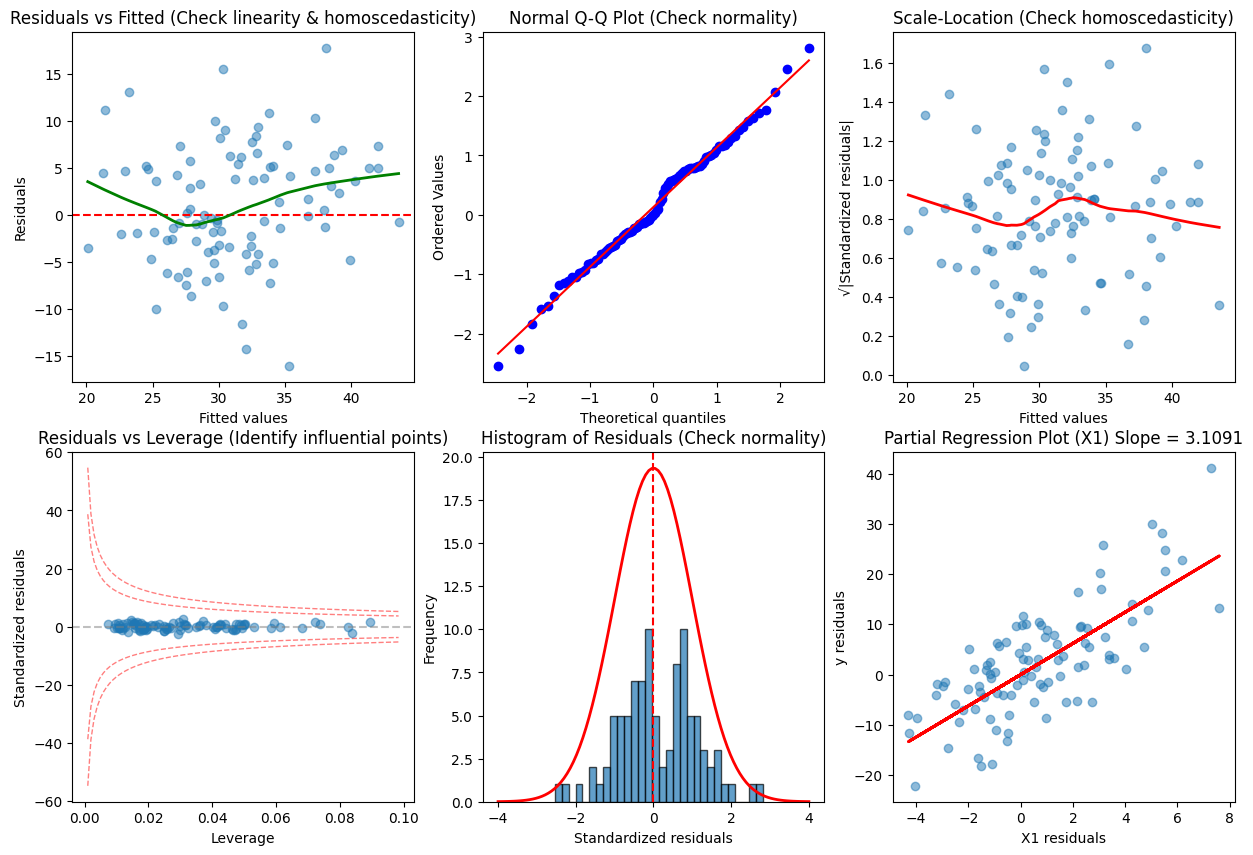

In [147]:
X_matrix = X_test.to_numpy()
Y_matrix = Y_test.to_numpy()

X_t = np.transpose(X_matrix)

y_pred = reg.predict(X_test)
residuals = y_pred - Y_matrix

MSE = np.mean(np.power(residuals, 2))
scikit_mse = MSE
sigma_hat = np.sqrt(MSE)

# Create comprehensive diagnostic plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Residuals vs Fitted
axes[0, 0].scatter(y_pred, residuals, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted (Check linearity & homoscedasticity)')

# Add lowess smoothing line

lowess_result = lowess(residuals, y_pred, frac=0.6)
axes[0, 0].plot(lowess_result[:, 0], lowess_result[:, 1], 'g-', linewidth=2)

# 2. Q-Q plot
standardized_residuals = residuals / sigma_hat
stats.probplot(standardized_residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q Plot (Check normality)')

# 3. Scale-Location (Spread-Location)
sqrt_abs_std_resid = np.sqrt(np.abs(standardized_residuals))
axes[0, 2].scatter(y_pred, sqrt_abs_std_resid, alpha=0.5)
lowess_sl = lowess(sqrt_abs_std_resid, y_pred, frac=0.6)
axes[0, 2].plot(lowess_sl[:, 0], lowess_sl[:, 1], 'r-', linewidth=2)
axes[0, 2].set_xlabel('Fitted values')
axes[0, 2].set_ylabel('√|Standardized residuals|')
axes[0, 2].set_title('Scale-Location (Check homoscedasticity)')

# 4. Residuals vs Leverage
# Calculate leverage (hat values)
H = np.matmul(np.matmul(X_matrix, np.linalg.matrix_power(np.matmul(X_t ,X_matrix), -1)), X_t)
leverage = np.diag(H)
axes[1, 0].scatter(leverage, standardized_residuals, alpha=0.5)
axes[1, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1, 0].set_xlabel('Leverage')
axes[1, 0].set_ylabel('Standardized residuals')
axes[1, 0].set_title('Residuals vs Leverage (Identify influential points)')

# Add Cook's distance contours
k = X_matrix.shape[1]

x_lev = np.linspace(0.001, max(leverage)*1.1, 100)
for cook_level in [0.5, 1.0]:
    y_cook_upper = np.sqrt(cook_level * k * (1 - x_lev) / x_lev)
    y_cook_lower = -y_cook_upper
    axes[1, 0].plot(x_lev, y_cook_upper, 'r--', alpha=0.5, linewidth=1)
    axes[1, 0].plot(x_lev, y_cook_lower, 'r--', alpha=0.5, linewidth=1)

# 5. Histogram of residuals
axes[1, 1].hist(standardized_residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--')
x_norm = np.linspace(-4, 4, 100)
axes[1, 1].plot(x_norm, stats.norm.pdf(x_norm) * len(residuals) * 0.5, 'r-', linewidth=2)
axes[1, 1].set_xlabel('Standardized residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Residuals (Check normality)')

# 6. Partial regression plots (for first predictor X1)
# Residuals of Y ~ X0(intercept) + X2 + X3
X_others = X_matrix[:, [1, 2]]  # Exclude X1 (column 1)
model_y_others = sm.OLS(Y_matrix, X_others).fit()
resid_y = model_y_others.resid

# Residuals of X1 ~ X0(intercept) + X2 + X3
model_x1_others = sm.OLS(X_matrix[:, 0], X_others).fit()
resid_x1 = model_x1_others.resid

axes[1, 2].scatter(resid_x1, resid_y, alpha=0.5)
partial_slope = np.cov(resid_x1, resid_y)[0, 1] / np.var(resid_x1)
axes[1, 2].plot(resid_x1, partial_slope * resid_x1, 'r-', linewidth=2)
axes[1, 2].set_xlabel('X1 residuals')
axes[1, 2].set_ylabel('y residuals')
axes[1, 2].set_title(f'Partial Regression Plot (X1) Slope = {partial_slope:.4f}')

# Additional diagnostic statistics
print("\n" + "="*60)
print("DIAGNOSTIC STATISTICS")
print("="*60)

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_pvalue = stats.shapiro(residuals[:5000] if len(residuals) > 5000 else residuals)
print(f"Shapiro-Wilk test: W = {shapiro_stat:.4f}, p-value = {shapiro_pvalue:.4f}")

# Jarque-Bera test for normality
jb_stat, jb_pvalue = stats.jarque_bera(residuals)
print(f"Jarque-Bera test: JB = {jb_stat:.4f}, p-value = {jb_pvalue:.4f}")

# Condition number (multicollinearity indicator)
XtX = np.matmul(X_t, X_matrix)
eigenvalues = np.linalg.eigvals(XtX)
condition_number = np.sqrt(max(eigenvalues) / min(eigenvalues))
print(f"Condition number: {condition_number:.2f}")

# Mean VIF (only for predictors, not intercept)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_matrix, i) for i in range(0, k)] 
print(f"VIF values: {[f'{v:.2f}' for v in vif]}")
print(f"Mean VIF: {np.mean(vif):.2f}")

print("MSE:", MSE)
pass

Отримані показники кращі ніж показники raw python моделі, отже модель можна вважати такою, що побудована коректно. Нижче наведено коефіцієнти лінійної регресії:

In [148]:
reg.coef_

array([ 1.11969202, -1.9488195 ,  1.69009733])

# Регресія на XGBoost

In [149]:
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123, booster = "gblinear")
xgb_r.fit(X_train, Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,'gblinear'
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


### Перевірка моделі на навчальному наборі даних


DIAGNOSTIC STATISTICS
Shapiro-Wilk test: W = 0.9973, p-value = 0.9672
Jarque-Bera test: JB = 1.2928, p-value = 0.5239
Condition number: 5.29
VIF values: ['7.44', '5.56', '4.23']
Mean VIF: 5.74
MSE: 49.004703311624056


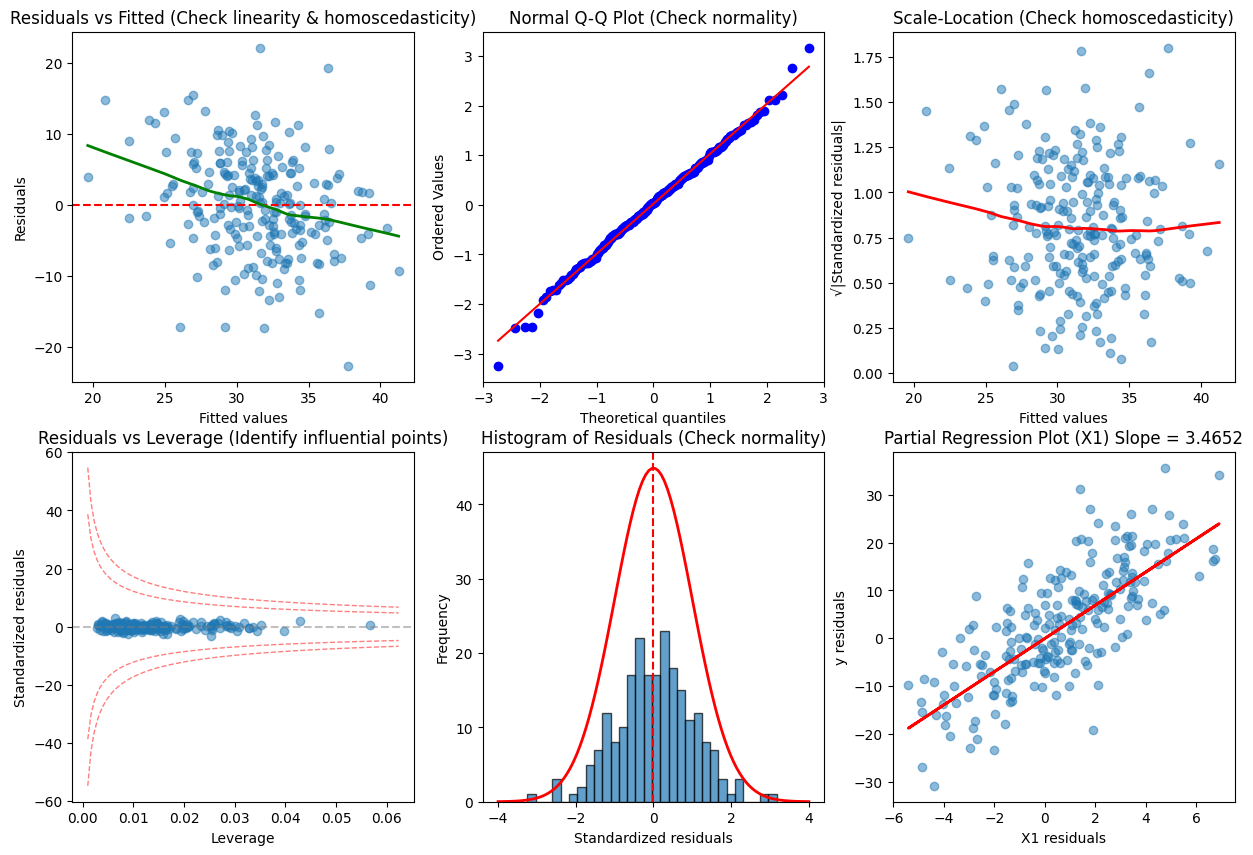

In [150]:
X_matrix = X_train.to_numpy()
Y_matrix = Y_train.to_numpy()

X_t = np.transpose(X_matrix)

y_pred = xgb_r.predict(X_train)
residuals = y_pred - Y_matrix

MSE = np.mean(np.power(residuals, 2))
sigma_hat = np.sqrt(MSE)

# Create comprehensive diagnostic plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Residuals vs Fitted
axes[0, 0].scatter(y_pred, residuals, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted (Check linearity & homoscedasticity)')

# Add lowess smoothing line

lowess_result = lowess(residuals, y_pred, frac=0.6)
axes[0, 0].plot(lowess_result[:, 0], lowess_result[:, 1], 'g-', linewidth=2)

# 2. Q-Q plot
standardized_residuals = residuals / sigma_hat
stats.probplot(standardized_residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q Plot (Check normality)')

# 3. Scale-Location (Spread-Location)
sqrt_abs_std_resid = np.sqrt(np.abs(standardized_residuals))
axes[0, 2].scatter(y_pred, sqrt_abs_std_resid, alpha=0.5)
lowess_sl = lowess(sqrt_abs_std_resid, y_pred, frac=0.6)
axes[0, 2].plot(lowess_sl[:, 0], lowess_sl[:, 1], 'r-', linewidth=2)
axes[0, 2].set_xlabel('Fitted values')
axes[0, 2].set_ylabel('√|Standardized residuals|')
axes[0, 2].set_title('Scale-Location (Check homoscedasticity)')

# 4. Residuals vs Leverage
# Calculate leverage (hat values)
H = np.matmul(np.matmul(X_matrix, np.linalg.matrix_power(np.matmul(X_t ,X_matrix), -1)), X_t)
leverage = np.diag(H)
axes[1, 0].scatter(leverage, standardized_residuals, alpha=0.5)
axes[1, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1, 0].set_xlabel('Leverage')
axes[1, 0].set_ylabel('Standardized residuals')
axes[1, 0].set_title('Residuals vs Leverage (Identify influential points)')

# Add Cook's distance contours
k = X_matrix.shape[1]

x_lev = np.linspace(0.001, max(leverage)*1.1, 100)
for cook_level in [0.5, 1.0]:
    y_cook_upper = np.sqrt(cook_level * k * (1 - x_lev) / x_lev)
    y_cook_lower = -y_cook_upper
    axes[1, 0].plot(x_lev, y_cook_upper, 'r--', alpha=0.5, linewidth=1)
    axes[1, 0].plot(x_lev, y_cook_lower, 'r--', alpha=0.5, linewidth=1)

# 5. Histogram of residuals
axes[1, 1].hist(standardized_residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--')
x_norm = np.linspace(-4, 4, 100)
axes[1, 1].plot(x_norm, stats.norm.pdf(x_norm) * len(residuals) * 0.5, 'r-', linewidth=2)
axes[1, 1].set_xlabel('Standardized residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Residuals (Check normality)')

# 6. Partial regression plots (for first predictor X1)
# Residuals of Y ~ X0(intercept) + X2 + X3
X_others = X_matrix[:, [1, 2]]  # Exclude X1 (column 1)
model_y_others = sm.OLS(Y_matrix, X_others).fit()
resid_y = model_y_others.resid

# Residuals of X1 ~ X0(intercept) + X2 + X3
model_x1_others = sm.OLS(X_matrix[:, 0], X_others).fit()
resid_x1 = model_x1_others.resid

axes[1, 2].scatter(resid_x1, resid_y, alpha=0.5)
partial_slope = np.cov(resid_x1, resid_y)[0, 1] / np.var(resid_x1)
axes[1, 2].plot(resid_x1, partial_slope * resid_x1, 'r-', linewidth=2)
axes[1, 2].set_xlabel('X1 residuals')
axes[1, 2].set_ylabel('y residuals')
axes[1, 2].set_title(f'Partial Regression Plot (X1) Slope = {partial_slope:.4f}')

# Additional diagnostic statistics
print("\n" + "="*60)
print("DIAGNOSTIC STATISTICS")
print("="*60)

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_pvalue = stats.shapiro(residuals[:5000] if len(residuals) > 5000 else residuals)
print(f"Shapiro-Wilk test: W = {shapiro_stat:.4f}, p-value = {shapiro_pvalue:.4f}")

# Jarque-Bera test for normality
jb_stat, jb_pvalue = stats.jarque_bera(residuals)
print(f"Jarque-Bera test: JB = {jb_stat:.4f}, p-value = {jb_pvalue:.4f}")

# Condition number (multicollinearity indicator)
XtX = np.matmul(X_t, X_matrix)
eigenvalues = np.linalg.eigvals(XtX)
condition_number = np.sqrt(max(eigenvalues) / min(eigenvalues))
print(f"Condition number: {condition_number:.2f}")

# Mean VIF (only for predictors, not intercept)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_matrix, i) for i in range(0, k)] 
print(f"VIF values: {[f'{v:.2f}' for v in vif]}")
print(f"Mean VIF: {np.mean(vif):.2f}")

print("MSE:", MSE)
pass

### Перевірка моделі на тестовому наборі даних


DIAGNOSTIC STATISTICS
Shapiro-Wilk test: W = 0.9852, p-value = 0.3502
Jarque-Bera test: JB = 1.1930, p-value = 0.5507
Condition number: 5.37
VIF values: ['7.06', '6.52', '4.75']
Mean VIF: 6.11
MSE: 40.413246586424734


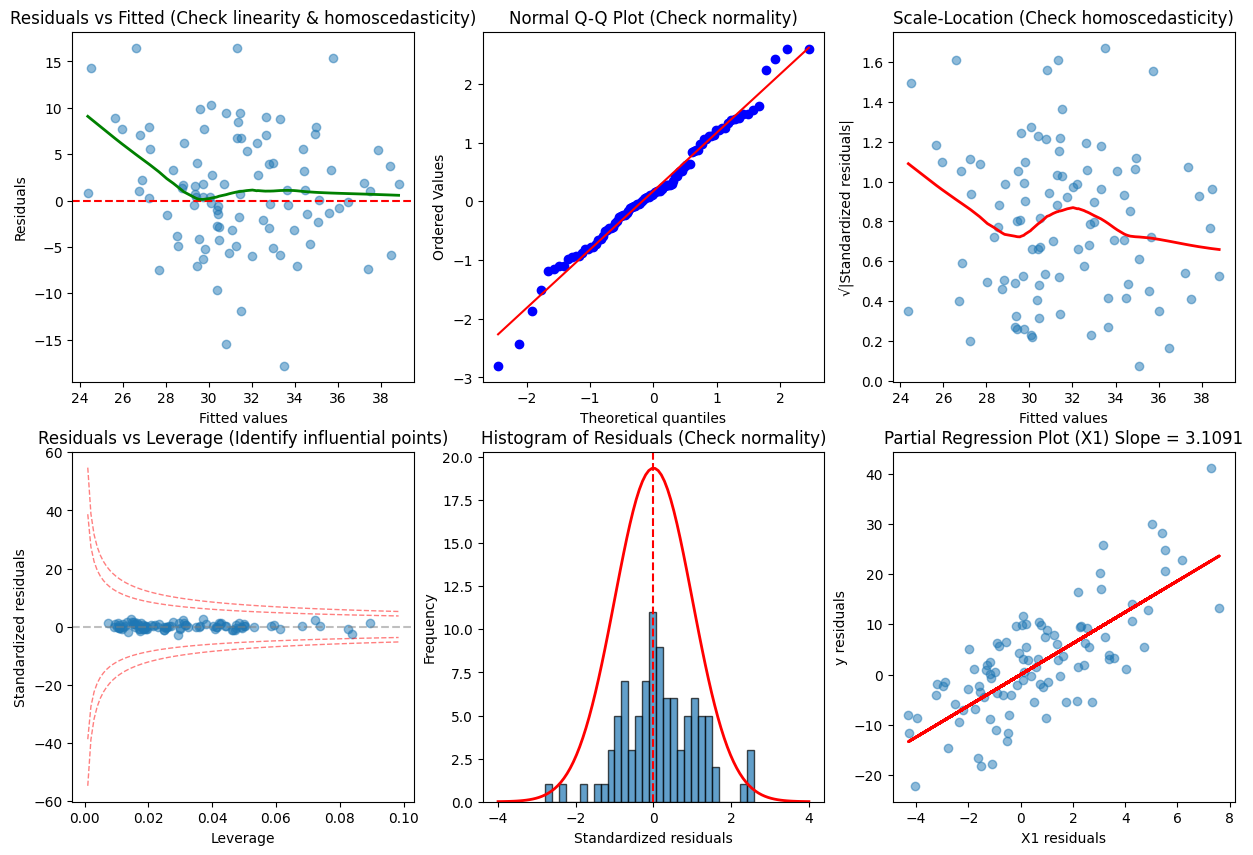

In [151]:
X_matrix = X_test.to_numpy()
Y_matrix = Y_test.to_numpy()

X_t = np.transpose(X_matrix)

y_pred = xgb_r.predict(X_test)
residuals = y_pred - Y_matrix

MSE = np.mean(np.power(residuals, 2))
xg_mse = MSE
sigma_hat = np.sqrt(MSE)

# Create comprehensive diagnostic plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Residuals vs Fitted
axes[0, 0].scatter(y_pred, residuals, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted (Check linearity & homoscedasticity)')

# Add lowess smoothing line

lowess_result = lowess(residuals, y_pred, frac=0.6)
axes[0, 0].plot(lowess_result[:, 0], lowess_result[:, 1], 'g-', linewidth=2)

# 2. Q-Q plot
standardized_residuals = residuals / sigma_hat
stats.probplot(standardized_residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q Plot (Check normality)')

# 3. Scale-Location (Spread-Location)
sqrt_abs_std_resid = np.sqrt(np.abs(standardized_residuals))
axes[0, 2].scatter(y_pred, sqrt_abs_std_resid, alpha=0.5)
lowess_sl = lowess(sqrt_abs_std_resid, y_pred, frac=0.6)
axes[0, 2].plot(lowess_sl[:, 0], lowess_sl[:, 1], 'r-', linewidth=2)
axes[0, 2].set_xlabel('Fitted values')
axes[0, 2].set_ylabel('√|Standardized residuals|')
axes[0, 2].set_title('Scale-Location (Check homoscedasticity)')

# 4. Residuals vs Leverage
# Calculate leverage (hat values)
H = np.matmul(np.matmul(X_matrix, np.linalg.matrix_power(np.matmul(X_t ,X_matrix), -1)), X_t)
leverage = np.diag(H)
axes[1, 0].scatter(leverage, standardized_residuals, alpha=0.5)
axes[1, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1, 0].set_xlabel('Leverage')
axes[1, 0].set_ylabel('Standardized residuals')
axes[1, 0].set_title('Residuals vs Leverage (Identify influential points)')

# Add Cook's distance contours
k = X_matrix.shape[1]

x_lev = np.linspace(0.001, max(leverage)*1.1, 100)
for cook_level in [0.5, 1.0]:
    y_cook_upper = np.sqrt(cook_level * k * (1 - x_lev) / x_lev)
    y_cook_lower = -y_cook_upper
    axes[1, 0].plot(x_lev, y_cook_upper, 'r--', alpha=0.5, linewidth=1)
    axes[1, 0].plot(x_lev, y_cook_lower, 'r--', alpha=0.5, linewidth=1)

# 5. Histogram of residuals
axes[1, 1].hist(standardized_residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--')
x_norm = np.linspace(-4, 4, 100)
axes[1, 1].plot(x_norm, stats.norm.pdf(x_norm) * len(residuals) * 0.5, 'r-', linewidth=2)
axes[1, 1].set_xlabel('Standardized residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Residuals (Check normality)')

# 6. Partial regression plots (for first predictor X1)
# Residuals of Y ~ X0(intercept) + X2 + X3
X_others = X_matrix[:, [1, 2]]  # Exclude X1 (column 1)
model_y_others = sm.OLS(Y_matrix, X_others).fit()
resid_y = model_y_others.resid

# Residuals of X1 ~ X0(intercept) + X2 + X3
model_x1_others = sm.OLS(X_matrix[:, 0], X_others).fit()
resid_x1 = model_x1_others.resid

axes[1, 2].scatter(resid_x1, resid_y, alpha=0.5)
partial_slope = np.cov(resid_x1, resid_y)[0, 1] / np.var(resid_x1)
axes[1, 2].plot(resid_x1, partial_slope * resid_x1, 'r-', linewidth=2)
axes[1, 2].set_xlabel('X1 residuals')
axes[1, 2].set_ylabel('y residuals')
axes[1, 2].set_title(f'Partial Regression Plot (X1) Slope = {partial_slope:.4f}')

# Additional diagnostic statistics
print("\n" + "="*60)
print("DIAGNOSTIC STATISTICS")
print("="*60)

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_pvalue = stats.shapiro(residuals[:5000] if len(residuals) > 5000 else residuals)
print(f"Shapiro-Wilk test: W = {shapiro_stat:.4f}, p-value = {shapiro_pvalue:.4f}")

# Jarque-Bera test for normality
jb_stat, jb_pvalue = stats.jarque_bera(residuals)
print(f"Jarque-Bera test: JB = {jb_stat:.4f}, p-value = {jb_pvalue:.4f}")

# Condition number (multicollinearity indicator)
XtX = np.matmul(X_t, X_matrix)
eigenvalues = np.linalg.eigvals(XtX)
condition_number = np.sqrt(max(eigenvalues) / min(eigenvalues))
print(f"Condition number: {condition_number:.2f}")

# Mean VIF (only for predictors, not intercept)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_matrix, i) for i in range(0, k)] 
print(f"VIF values: {[f'{v:.2f}' for v in vif]}")
print(f"Mean VIF: {np.mean(vif):.2f}")

print("MSE:", MSE)
pass

# Порівняння результатів


In [152]:
from PythonTableConsole import PythonTableConsole as PTC

table = [
    ["Параметр", "Raw Python", "SciKit Learn", "XGBoost"],
    ["MSE", round(raw_mse,3), round(scikit_mse,3), round(xg_mse,3)],
    ["W1", round(B_matrix[0],3), round(reg.coef_[0],3), round(xgb_r.coef_[0],3)],
    ["W2", round(B_matrix[1],3), round(reg.coef_[1],3), round(xgb_r.coef_[1],3)],
    ["W3", round(B_matrix[2],3), round(reg.coef_[2],3), round(xgb_r.coef_[2],3)]
]
table = PTC(table)
table.transpose()
print(table)

|Параметр|Raw Python|SciKit Learn|XGBoost|
|     MSE|    52.597|      39.743| 40.413|
|      W1|     3.128|        1.12|  0.245|
|      W2|    -0.259|      -1.949| -1.279|
|      W3|     2.253|        1.69|  1.156|



Таким чином, модель побудована на SciKit є найкращою за MSE